In [151]:
#Q2 Optimisation

#2.1 Take different functions and optimize them on the computer (suggested types include globally concave function, function with multiple local optima, functions which can be made concave after a suitable reparametrization, etc.)

#For this, I use the following libraries

import scipy as sc
import numpy as np
import sympy as sm
import scipy.optimize as opt
import pandas as pd

sm.init_session(quiet = True) #So that sympy uses LaTeX to print mathematical expressions making them easier to read

In [152]:
#I begin with a globally concave function in one variable and solve it theoretically with sympy

y, x = sm.symbols('y, x')

y = - (x**2)

sm.solve(y.diff(x), x)

#The answer 0 is displayed below. FOC is sufficient because the function is globally concave

In [153]:
#Now I maximise a globally concave multivariate function theoretically with sympy

z, y, x = sm.symbols('z, y, x')

z = - x**2 + y**2

FOC1 = sm.solve(z.diff(x), x, y) #First FOC
FOC2 = sm.solve(z.diff(y), y, x) #Second FOC

sm.solve((x - FOC1[0][0], y - FOC2[0][0], x, y)) #Solving both the conditions simultaneously

#The answer x = 0, y = 0 is displayed. Because of global concavity, FOCs suffice

In [154]:
#Now I maximise a single variable function that has two maxima using sympy

y, x = sm.symbols('y, x')

y = 4*(x**2) - x**4

FOC = sm.solve(y.diff(x), x) #Finding critical points

solutions = []

for i in FOC: #For each critical point
    if y.diff(x).diff(x).evalf(subs = {x:i}) < 0: #Checking the second order condition
        solutions.append(i) #Keeping only those critical points that satisfy the 2nd order condition

print(solutions)

#The answers -sqrt(2), sqrt(2) are displayed below

[-sqrt(2), sqrt(2)]


The maximum value of the function is
0.49992002618678677
++++++++++++++++++++
The following are the hundred different estimates of the maxima
Since there are 100 different estimates, it would be difficult to eyeball them when printed
I instead display them on a plot to make comprehension easier


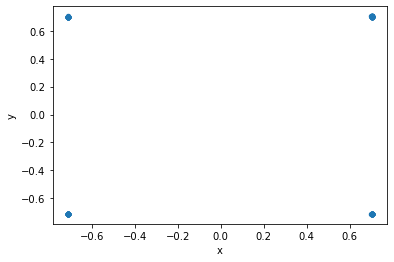

It appears that there are 4 maxima: at (-0.7, -0.7), (-0.7, 0.7), (0.7, -0.7) and (0.7, 0.7)


In [155]:
#Now I maximise a multivariable function with multiple maxima numerically using scipy

#I wish to maximise the function g(x) = x^2 + y^2 - x^4 - y^4
#I minimise f(x) = - g(x) to get the same answer

# Defining the function to minimize
def f(x):
    return - x[0]**2 - x[1]**2 + x[0]**4 + x[1]**4

#I will use the Newton-Rhapson method for this
#I use 100 different initial guesses and see where the answers converge

solutions = []
    
for i in range(10):
    for j in range(10):
        initialGuess = [(4*(i+1) - 22) / 9, (4*(j+1) - 22) / 9] #This generates an equally spaced grid from -2 to 2 in both dimensions
        fprime = lambda x: opt.approx_fprime(x, f, 0.01) #There is a bug where only a callable Jacobian is accepted, this pre-calculates it numerically to avoid the bug
        soln = opt.minimize(f, x0 = initialGuess, method = 'Newton-CG', jac = fprime)
        solutions.append(soln.x) 

maxVal = - soln.fun
print('The maximum value of the function is')
print(maxVal)
print('++++++++++++++++++++')
print('The following are the hundred different estimates of the maxima')

print('Since there are 100 different estimates, it would be difficult to eyeball them when printed')
print('I instead display them on a plot to make comprehension easier')
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.DataFrame(solutions)
df.columns = ['x', 'y']
df.plot.scatter(x='x', y='y')
plt.show()

print('It appears that there are 4 maxima: at (-0.7, -0.7), (-0.7, 0.7), (0.7, -0.7) and (0.7, 0.7)')

#If you wish to see the full list, however, you can uncomment the line below and run the code to see the full solutions' list

#print(df)

The maximum value of the function is
-2.3371724654424087e-05
++++++++++++++++++++
The following are the hundred different estimates of the maxima
Since there are 100 different estimates, it would be difficult to eyeball them when printed
I instead display them on a plot to make comprehension easier


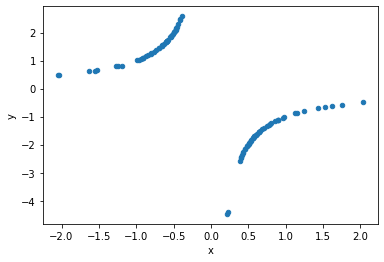

These estimates are scattered all around, probably because the function is misbehaving with respect to y
These roughly appear to be rectangular hyperbolae
Let us simplify things by reparametrisation to be more clear


In [156]:
#I now maximise a function which is concave only after reparametrisation

#Consider the function g(x, y) = -(x + (1/y))^2
#This function is not concave in y

#I will first maximise it using Newton-Rhapson with scipy and then reparametrise it and solve it theoretically with sympy

#Newton-Rhapson:

#I minimise f(x, y) = - g(x, y) to get the same solution 

def f(x):
    return ((x[0] + (1/x[1])) ** 2)

solutions = []
    
for i in range(10):
    for j in range(10):
        initialGuess = [(4*(i+1) - 22) / 9, (4*(j+1) - 22) / 9] #This generates an equally spaced grid from -2 to 2 in both dimensions
        fprime = lambda x: opt.approx_fprime(x, f, 0.01) #There is a bug where only a callable Jacobian is accepted, this pre-calculates it numerically to avoid the bug
        soln = opt.minimize(f, x0 = initialGuess, method = 'Newton-CG', jac = fprime)
        solutions.append(soln.x) 

maxVal = - soln.fun
print('The maximum value of the function is')
print(maxVal)
print('++++++++++++++++++++')
print('The following are the hundred different estimates of the maxima')

print('Since there are 100 different estimates, it would be difficult to eyeball them when printed')
print('I instead display them on a plot to make comprehension easier')
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.DataFrame(solutions)
df.columns = ['x', 'y']
df.plot.scatter(x='x', y='y')
plt.show()

#The Newton-Rhapson estimates are scattered all around, and we cannot make anything out of it
print('These estimates are scattered all around, probably because the function is misbehaving with respect to y')
print('These roughly appear to be rectangular hyperbolae')
print('Let us simplify things by reparametrisation to be more clear')

The maximum value of the function is
-2.5000000030989552e-05
++++++++++++++++++++
The following are the hundred different estimates of the maxima
Since there are 100 different estimates, it would be difficult to eyeball them when printed
I instead display them on a plot to make comprehension easier


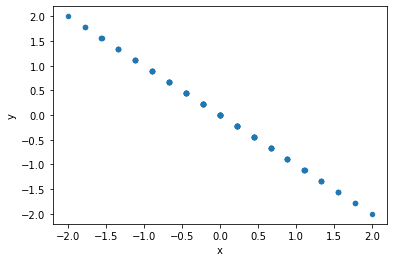

Let us fit a line through it


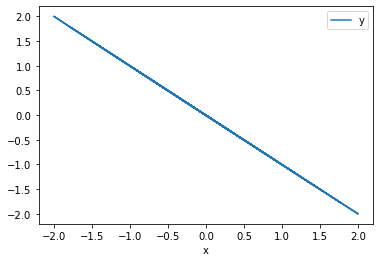

The solutions all lie on the line t = -x
This gives us 1/y = -x or y = -1/x as our required solution


In [157]:
#I now reparametrise it by defining t = 1/y
#With this the function becomes g(x) = (x + t)^2

#I now solve it again using Newton-Rhapson

def f(x):
    return ((x[0] + x[1]) ** 2)

solutions = []
    
for i in range(10):
    for j in range(10):
        initialGuess = [(4*(i+1) - 22) / 9, (4*(j+1) - 22) / 9] #This generates an equally spaced grid from -2 to 2 in both dimensions
        fprime = lambda x: opt.approx_fprime(x, f, 0.01) #There is a bug where only a callable Jacobian is accepted, this pre-calculates it numerically to avoid the bug
        soln = opt.minimize(f, x0 = initialGuess, method = 'Newton-CG', jac = fprime)
        solutions.append(soln.x) 

maxVal = - soln.fun
print('The maximum value of the function is')
print(maxVal)
print('++++++++++++++++++++')
print('The following are the hundred different estimates of the maxima')

print('Since there are 100 different estimates, it would be difficult to eyeball them when printed')
print('I instead display them on a plot to make comprehension easier')
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.DataFrame(solutions)
df.columns = ['x', 'y']
df.plot.scatter(x='x', y='y')
plt.show()
print('Let us fit a line through it')
df.plot(x = 'x', y = 'y')
plt.show()

print('The solutions all lie on the line t = -x')
print('This gives us 1/y = -x or y = -1/x as our required solution')

In [158]:
#We can confirm the previous conclusion theoretically with sympy

z, y, x = sm.symbols('z, y, x')

z = (x + (1/y))**2

sm.solve([z.diff(x), z.diff(y)], y)

#We get the same answer as the previous approach